# Libraries


In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.0 MB/s eta 0:00:00


In [2]:
pip install currencyconverter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.6/563.6 KB 8.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import datetime as dt
from currency_converter import CurrencyConverter
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [4]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Reading the Data

In [7]:
df = pd.read_csv("df_listings.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (30,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [9]:
def general_info (dataframe):
    print('\033[1m' +f'{get_df_name(dataframe).upper()}'+'\033[0m')
    print("\n")
    print('\033[1m' +f" SHAPE ".center(30, '-')+'\033[0m')
    print(dataframe.shape,"\n")
    print('\033[1m' +f" VARIABLE TYPES ".center(30, '-')+'\033[0m')
    print(dataframe.info(),"\n")
    print('\033[1m' +f" NULL VALUE ".center(30, '-')+'\033[0m')
    print(dataframe.isnull().sum(),"\n")

In [10]:
general_info(df)

DF


----------- SHAPE ------------
(245139, 77) 

------- VARIABLE TYPES -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245139 entries, 0 to 245138
Data columns (total 77 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    245139 non-null  int64  
 1   id                                            245139 non-null  int64  
 2   listing_url                                   245139 non-null  object 
 3   scrape_id                                     245139 non-null  int64  
 4   last_scraped                                  245139 non-null  object 
 5   source                                        245139 non-null  object 
 6   name                                          245038 non-null  object 
 7   description                                   241050 non-null  object 
 8   neighborhood_overview                     

In [11]:
df.head()


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.000,1.000,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.364,4.944,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.000,2.000,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",$49.00,3,28,3.000,3.000,1125.000,1125.000,3.000,1125.000,NaN,t,1,9,14,14,2022-09-07,305,25,1,2009-03-30,2022-08-30,4.890,4.940,5.000,4.970,4.980,4.690,4.820,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.860,Amsterdam
1,1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,5.000,5.000,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.364,4.894,Private room in townhouse,Private room,2,NaN,1 private bath,1.000,1.000,"[""Wifi"", ""Refrigerator"", ""TV"", ""Fire extinguis...",$106.00,1,365,1.000,1.000,1125.000,1125.000,1.000,1125.000,NaN,t,0,0,0,0,2022-09-07,339,0,0,2010-03-02,2020-04-09,4.440,4.690,4.790,4.630,4.620,4.870,4.490,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.220,Amsterdam
2,2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.000,1.000,"['email', 'phone']",t,t,"Amsterdam, North Holland, Ne

# Numerical and Euro Transformation for Price

In [12]:
def price_transform(string):
    string = string.replace("$","")
    string = string.replace(",","")
    
    return(string)

In [13]:
df["price"] = df["price"].apply(price_transform)
df["price"] = df["price"].astype("float")

In [14]:
df[df["city"] == "Copenhagen"].sample(5)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
42724,42724,48534581,https://www.airbnb.com/rooms/48534581,20220924142144,2022-09-25,city scrape,Hjemlig og lækker lejlighed midt på Nørrebro,Kom og bo i en skøn lejlighed midt på Nørrebro...,NaN,https://a0.muscache.com/pictures/fdc67ce8-6d1e...,51427303,https://www.airbnb.com/users/show/51427303,Anne-Sofie,2015-12-15,"Copenhagen, Denmark",NaN,within an hour,100%,61%,t,https://a0.muscache.com/im/pictures/user/29d8d...,https://a0.muscache.com/im/pictures/user/29d8d...,NaN,3.000,5.000,"['email', 'phone']",t,t,NaN,Nrrebro,NaN,55.690,12.544,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.000,1.000,"[""Stove"", ""Long term stays allowed"", ""Coffee m...",850.000,2,1125,2.000,4.000,1125.000,1125.000,2.100,1125.000,NaN,t,3,3,4,8,2022-09-25,10,6,0,2021-05-16,2022-08-11,5.000,5.000,4.400,5.000,5.000,4.900,4.800,NaN,f,1,1,0,0,0.600,Copenhagen
35542,35542,3038553,https://www.airbnb.com/rooms/3038553,20220924142144,2022-09-25,city scrape,Cozy flat in the heart of Nørrebro,The apartment has the perfect location for exp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,15472907,https://www.airbnb.com/users/show/15472907,Sofus Emil Ravn,2014-05-13,"Copenhagen, Denmark",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/28098...,https://a0.muscache.com/im/pictures/user/28098...,NaN,1.000,1.000,['phone'],t,t,NaN,Nrrebro,NaN,55.683,12.558,Private room in rental unit,Private room,2,NaN,1 private bath,1.000,1.000,"[""Wifi"", ""Smoke alarm"", ""TV"", ""Washer"", ""Kitch...",500.000,2,2,2.000,2.000,2.000,2.000,2.000,2.000,NaN,t,0,0,0,267,2022-09-25,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN,Copenhagen
44603,44603,562335329284267175,https://www.airbnb.com/rooms/562335329284267175,20220924142144,2022-09-24,city scrape,Cool big studio apartment next to central station,Hyggelig stilfuld lejlighed på Vesterbro/Frede...,NaN,https://a0.muscache.com/pictures/bb9d461f-5be4...,81842869,https://www.airbnb.com/users/show/81842869,Morten,2016-07-05,"Copenhagen, Denmark","29 y/o, living in Copenhagen w. my boyfriend.",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7454e...,https://a0.muscache.com/im/pictures/user/7454e...,NaN,1.000,1.000,"['email', 'phone']",t,f,NaN,Vesterbro-Kongens Enghave,NaN,55.673,12.557,Entire condo,Entire home/apt,2,NaN,1 bath,1.000,1.000,"[""Wifi"", ""TV"", ""Long term stays allowed"", ""Kit...",895.000,4,365,4.000,4.000,365.000,365.000,4.000,365.000,NaN,t,0,0,0,266,2022-09-24,5,5,0,2022-04-18,2022-08-05,4.600,4.800,4.600,4.200,4.600,5.000,4.600,NaN,t,1,1,0,0,0.940,Copenhagen
46386,46386,652881536355266206,https://www.airbnb.com/rooms/652881536355266206,20

In [15]:
df.loc[(df['city'] == 'Stockholm'), 'currency'] = 'SEK'
df.loc[(df['city'] == 'Prague'), 'currency'] = 'CZK'
df.loc[(df['city'] == 'Copenhagen'), 'currency'] = 'DKK'
df.loc[(df['city'] == 'Zurich'), 'currency'] = 'CHF'
df.loc[(df['city'] == 'Oslo'), 'currency'] = 'NOK'
df.loc[~((df['city'] == 'Oslo') | (df['city'] == 'Zurich')| (df['city'] == 'Copenhagen') | (df['city'] == 'Prague') | (df['city'] == 'Stockholm')), 'currency'] = 'EUR'

In [16]:
c = CurrencyConverter()
date_obj = dt.datetime(2022, 12, 1)
df['price'] = df.apply( lambda x: c.convert(x.price, x.currency, 'EUR', date_obj), axis = 1)

In [17]:
df.drop("currency",axis=1,inplace=True)

# Exploratory Data Analysis (EDA)

In [18]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print('\033[1m'f"{get_df_name(dataframe).upper()}",'\033[0m' "\n")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(f"\nNumerical Columns:{num_cols}\nCategorical Columns:{cat_cols}\nCardinal Columns:{cat_but_car}")

DF 

Observations: 245139
Variables: 77
cat_cols: 14
num_cols: 39
cat_but_car: 24
num_but_cat: 2

Numerical Columns:['Unnamed: 0', 'id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_mon

In [20]:
def cat_summary(dataframe, col_name, plot=False):
  print('\033[1m' +f'{col_name.upper()}'.center(30, '-')+'\033[0m')
  print(pd.DataFrame({"Count": dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("\n")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()
    #print("\n")

In [21]:
for col in cat_cols:
    cat_summary(df, col)

---------LAST_SCRAPED---------
            Count  Ratio
2022-09-12  59316 24.197
2022-09-10  51907 21.175
2022-09-24  18900  7.710
2022-09-16  17941  7.319
2022-09-15  15353  6.263
2022-09-11  14489  5.911
2022-09-13  13856  5.652
2022-09-09  12215  4.983
2022-09-14   8486  3.462
2022-09-07   6892  2.811
2022-09-26   6494  2.649
2022-09-18   6065  2.474
2022-09-21   5382  2.195
2022-09-25   4272  1.743
2022-09-23   2246  0.916
2022-09-22   1245  0.508
2022-09-17     69  0.028
2022-09-19      7  0.003
2022-10-03      4  0.002


------------SOURCE------------
                  Count  Ratio
city scrape      171679 70.033
previous scrape   73460 29.967


------HOST_RESPONSE_TIME------
                     Count  Ratio
within an hour      119599 48.788
within a few hours   29937 12.212
within a day         21994  8.972
a few days or more    5581  2.277


------HOST_IS_SUPERHOST-------
    Count  Ratio
f  199671 81.452
t   45364 18.505


------HOST_VERIFICATIONS------
                       

In [22]:
def num_summary(dataframe, numerical_col, plot=False):
  print('\033[1m' +f'{numerical_col.upper()}'.center(30, '-')+'\033[0m')
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
  print("\n")

  if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        print("\n")

----------UNNAMED: 0----------
count   245139.000
mean    122569.000
std      70765.678
min          0.000
5%       12256.900
10%      24513.800
20%      49027.600
30%      73541.400
40%      98055.200
50%     122569.000
60%     147082.800
70%     171596.600
80%     196110.400
90%     220624.200
95%     232881.100
99%     242686.620
max     245138.000
Name: Unnamed: 0, dtype: float64




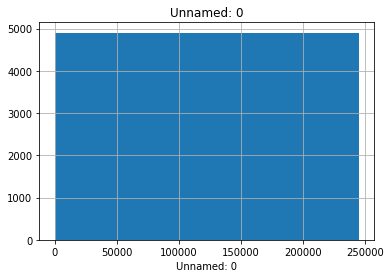



--------------ID--------------
count               245139.000
mean    125542604679405680.000
std     255331258614727008.000
min                   2352.000
5%                 2847014.500
10%                6321677.600
20%               13651373.800
30%               20508903.400
40%               27446404.400
50%               35190363.000
60%               41975202.800
70%               49703137.600
80%               54240330.200
90%     646430610264231424.000
95%     677442380102882432.000
99%     707846180550138496.000
max     723888108373004032.000
Name: id, dtype: float64




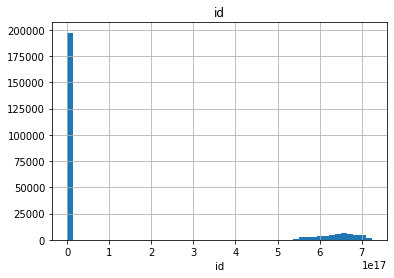



----------SCRAPE_ID-----------
count           245139.000
mean    20220913365156.402
std            5102919.404
min     20220907151523.000
5%      20220909140132.000
10%     20220909140132.000
20%     20220909140132.000
30%     20220910194401.000
40%     20220911230855.000
50%     20220911230914.000
60%     20220912200221.000
70%     20220914194856.000
80%     20220916161105.000
90%     20220924142144.000
95%     20220924142204.000
99%     20220926045633.000
max     20220926045633.000
Name: scrape_id, dtype: float64




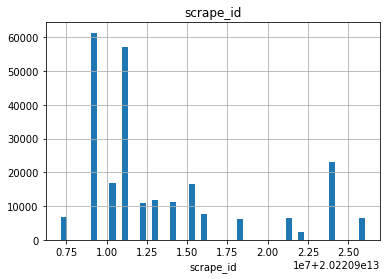



-----------HOST_ID------------
count      245139.000
mean    129260293.414
std     142762953.099
min           275.000
5%        2242521.700
10%       4641209.000
20%      11569705.800
30%      22557964.000
40%      37295091.000
50%      61504821.000
60%     105319052.000
70%     170973439.000
80%     260398297.000
90%     385740410.000
95%     440119693.300
99%     471348795.540
max     480764897.000
Name: host_id, dtype: float64




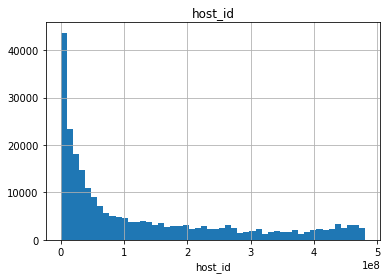



-----HOST_LISTINGS_COUNT------
count   245099.000
mean        16.831
std         73.400
min          0.000
5%           1.000
10%          1.000
20%          1.000
30%          1.000
40%          1.000
50%          2.000
60%          2.000
70%          4.000
80%          8.000
90%         29.000
95%         81.000
99%        278.000
max       2157.000
Name: host_listings_count, dtype: float64




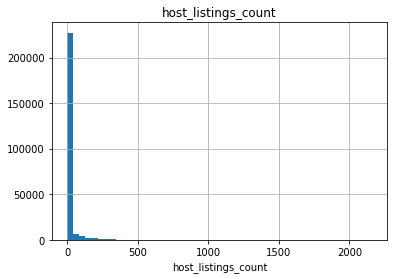



--HOST_TOTAL_LISTINGS_COUNT---
count   245099.000
mean        34.103
std        409.566
min          0.000
5%           1.000
10%          1.000
20%          1.000
30%          1.000
40%          2.000
50%          2.000
60%          3.000
70%          5.000
80%         11.000
90%         39.000
95%        109.000
99%        446.000
max      20000.000
Name: host_total_listings_count, dtype: float64




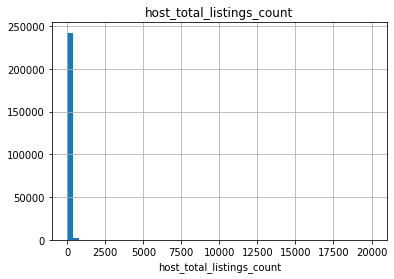



-----------LATITUDE-----------
count   245139.000
mean        47.050
std          5.289
min         37.302
5%          40.410
10%         40.445
20%         41.394
30%         41.905
40%         45.764
50%         48.232
60%         48.858
70%         48.882
80%         50.846
90%         52.552
95%         55.698
99%         59.924
max         60.039
Name: latitude, dtype: float64




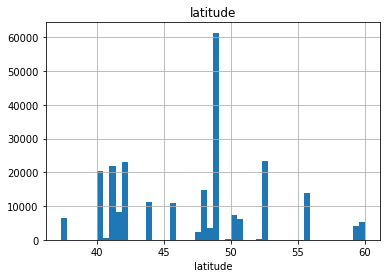



----------LONGITUDE-----------
count   245139.000
mean         5.856
std          7.019
min         -8.783
5%          -6.005
10%         -3.706
20%          2.172
30%          2.325
40%          2.363
50%          4.394
60%         10.772
70%         12.457
80%         12.551
90%         13.477
95%         16.344
99%         18.029
max         18.211
Name: longitude, dtype: float64




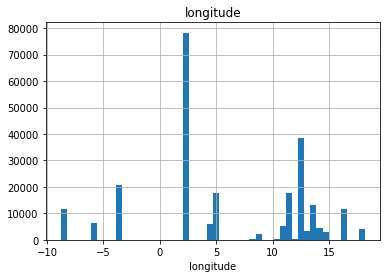



---------ACCOMMODATES---------
count   245139.000
mean         3.290
std          1.908
min          0.000
5%           1.000
10%          2.000
20%          2.000
30%          2.000
40%          2.000
50%          3.000
60%          4.000
70%          4.000
80%          4.000
90%          6.000
95%          6.000
99%         10.000
max         16.000
Name: accommodates, dtype: float64




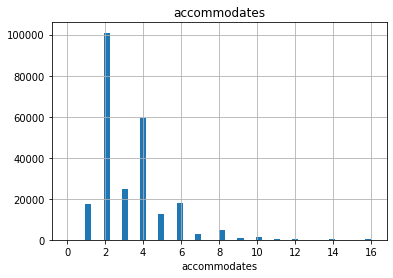



-----------BEDROOMS-----------
count   223308.000
mean         1.478
std          0.954
min          1.000
5%           1.000
10%          1.000
20%          1.000
30%          1.000
40%          1.000
50%          1.000
60%          1.000
70%          2.000
80%          2.000
90%          3.000
95%          3.000
99%          4.000
max        101.000
Name: bedrooms, dtype: float64




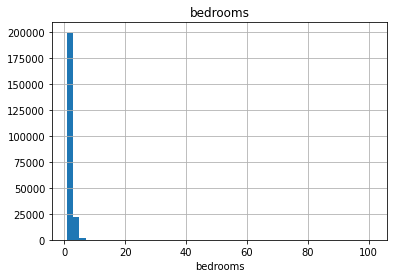



-------------BEDS-------------
count   241458.000
mean         1.997
std          1.533
min          1.000
5%           1.000
10%          1.000
20%          1.000
30%          1.000
40%          1.000
50%          2.000
60%          2.000
70%          2.000
80%          3.000
90%          4.000
95%          5.000
99%          7.000
max         90.000
Name: beds, dtype: float64




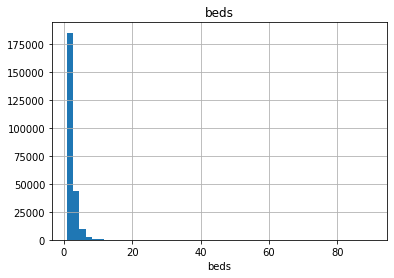



------------PRICE-------------
count   245139.000
mean       150.078
std        495.391
min          0.000
5%          30.000
10%         40.000
20%         55.000
30%         69.000
40%         80.809
50%         97.000
60%        116.000
70%        141.000
80%        181.000
90%        266.922
95%        376.481
99%        881.000
max      91000.000
Name: price, dtype: float64




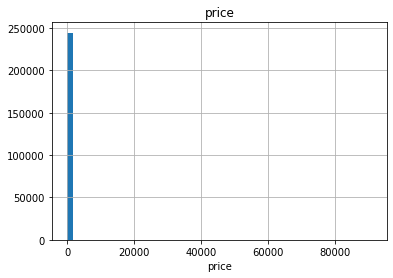



--------MINIMUM_NIGHTS--------
count   245139.000
mean        29.014
std         92.657
min          1.000
5%           1.000
10%          1.000
20%          1.000
30%          2.000
40%          2.000
50%          2.000
60%          3.000
70%          4.000
80%          6.000
90%         31.000
95%        365.000
99%        365.000
max       9999.000
Name: minimum_nights, dtype: float64




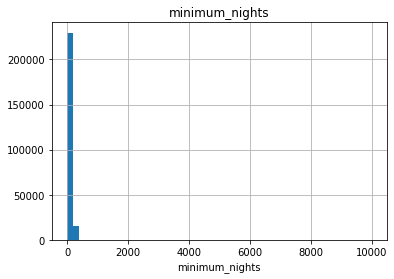



--------MAXIMUM_NIGHTS--------
count     245139.000
mean         655.622
std        20275.948
min            1.000
5%             8.000
10%           15.000
20%           30.000
30%           90.000
40%          365.000
50%          365.000
60%         1125.000
70%         1125.000
80%         1125.000
90%         1125.000
95%         1125.000
99%         1125.000
max     10000000.000
Name: maximum_nights, dtype: float64




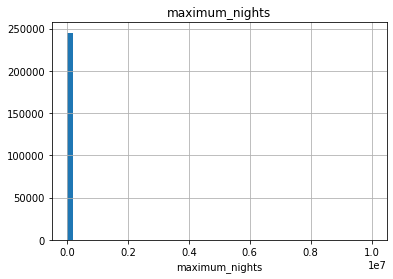



----MINIMUM_MINIMUM_NIGHTS----
count   245114.000
mean        28.646
std         92.315
min          1.000
5%           1.000
10%          1.000
20%          1.000
30%          1.000
40%          2.000
50%          2.000
60%          3.000
70%          3.000
80%          5.000
90%         30.000
95%        365.000
99%        365.000
max       9999.000
Name: minimum_minimum_nights, dtype: float64




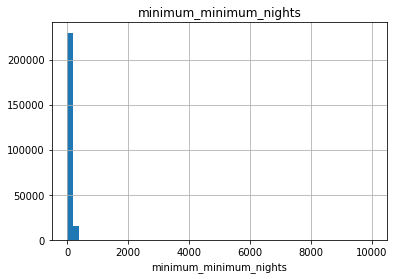



----MAXIMUM_MINIMUM_NIGHTS----
count   245114.000
mean        32.009
std        100.306
min          1.000
5%           1.000
10%          1.000
20%          2.000
30%          2.000
40%          2.000
50%          3.000
60%          3.000
70%          4.000
80%          7.000
90%         31.000
95%        365.000
99%        365.000
max       9999.000
Name: maximum_minimum_nights, dtype: float64




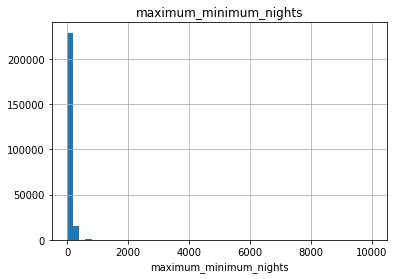



----MINIMUM_MAXIMUM_NIGHTS----
count       245114.000
mean        237296.395
std       22537444.961
min              1.000
5%               6.000
10%             14.000
20%             30.000
30%            300.000
40%            365.000
50%           1125.000
60%           1125.000
70%           1125.000
80%           1125.000
90%           1125.000
95%           1125.000
99%           1125.000
max     2147483647.000
Name: minimum_maximum_nights, dtype: float64




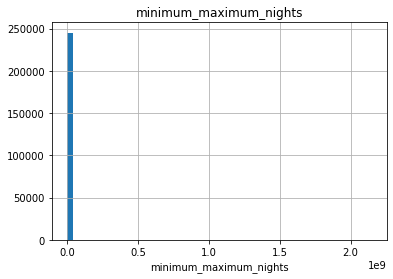



----MAXIMUM_MAXIMUM_NIGHTS----
count       245114.000
mean        473896.073
std       31870997.479
min              1.000
5%              10.000
10%             20.000
20%             60.000
30%            365.000
40%            999.000
50%           1125.000
60%           1125.000
70%           1125.000
80%           1125.000
90%           1125.000
95%           1125.000
99%           1125.000
max     2147483647.000
Name: maximum_maximum_nights, dtype: float64




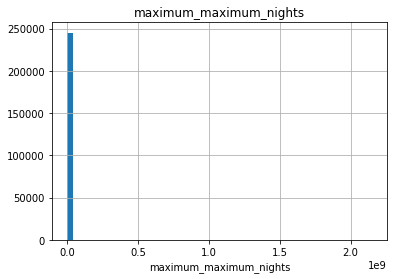



----MINIMUM_NIGHTS_AVG_NTM----
count   245114.000
mean        31.137
std         99.027
min          1.000
5%           1.000
10%          1.000
20%          1.100
30%          2.000
40%          2.000
50%          2.400
60%          3.000
70%          4.000
80%          6.000
90%         31.000
95%        365.000
99%        365.000
max       9999.000
Name: minimum_nights_avg_ntm, dtype: float64




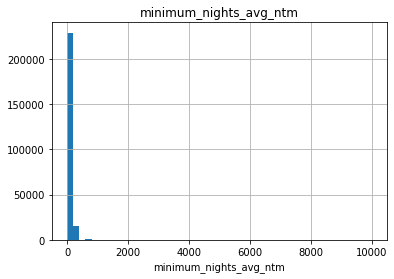



----MAXIMUM_NIGHTS_AVG_NTM----
count       245114.000
mean        376823.890
std       27789639.011
min              1.000
5%              10.000
10%             20.000
20%             60.000
30%            365.000
40%            365.000
50%           1125.000
60%           1125.000
70%           1125.000
80%           1125.000
90%           1125.000
95%           1125.000
99%           1125.000
max     2147483647.000
Name: maximum_nights_avg_ntm, dtype: float64




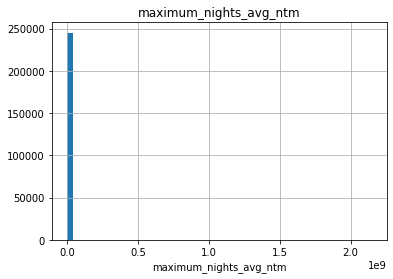



-------AVAILABILITY_30--------
count   245139.000
mean         5.711
std          8.461
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          1.000
60%          3.000
70%          6.000
80%         11.000
90%         20.000
95%         27.000
99%         30.000
max         30.000
Name: availability_30, dtype: float64




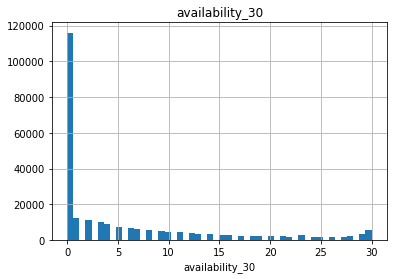



-------AVAILABILITY_60--------
count   245139.000
mean        15.753
std         19.060
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          1.000
50%          7.000
60%         14.000
70%         23.000
80%         35.000
90%         48.000
95%         56.000
99%         60.000
max         60.000
Name: availability_60, dtype: float64




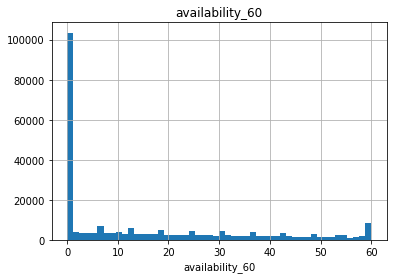



-------AVAILABILITY_90--------
count   245139.000
mean        28.761
std         30.931
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          2.000
50%         16.000
60%         36.000
70%         49.000
80%         62.000
90%         77.000
95%         86.000
99%         90.000
max         90.000
Name: availability_90, dtype: float64




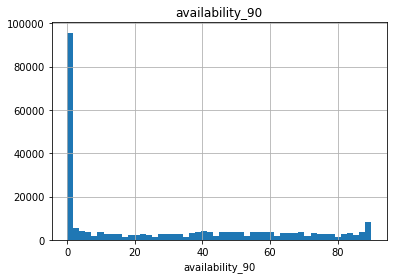



-------AVAILABILITY_365-------
count   245139.000
mean       139.008
std        135.997
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          3.000
40%         44.000
50%         90.000
60%        167.000
70%        253.000
80%        308.000
90%        339.000
95%        355.000
99%        365.000
max        365.000
Name: availability_365, dtype: float64




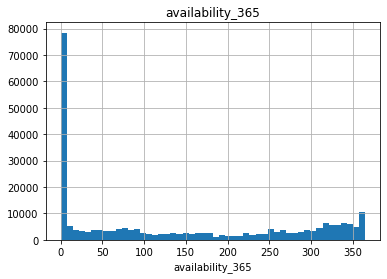



------NUMBER_OF_REVIEWS-------
count   245139.000
mean        35.403
std         69.800
min          0.000
5%           0.000
10%          0.000
20%          1.000
30%          2.000
40%          5.000
50%          9.000
60%         15.000
70%         26.000
80%         48.000
90%        102.000
95%        170.000
99%        343.620
max       2391.000
Name: number_of_reviews, dtype: float64




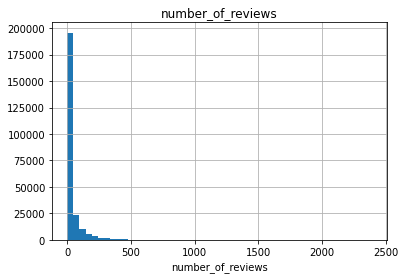



----NUMBER_OF_REVIEWS_LTM-----
count   245139.000
mean         9.749
std         19.159
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          1.000
50%          2.000
60%          4.000
70%          8.000
80%         16.000
90%         31.000
95%         45.000
99%         76.000
max       1356.000
Name: number_of_reviews_ltm, dtype: float64




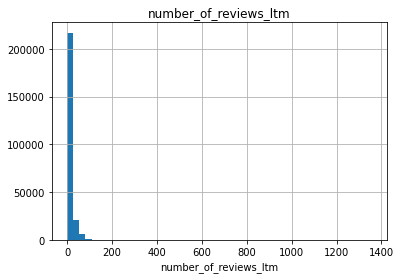



----NUMBER_OF_REVIEWS_L30D----
count   245139.000
mean         0.936
std          1.893
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          1.000
80%          2.000
90%          3.000
95%          5.000
99%          8.000
max        126.000
Name: number_of_reviews_l30d, dtype: float64




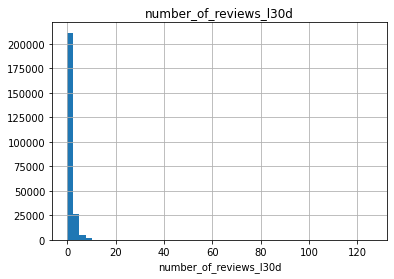



-----REVIEW_SCORES_RATING-----
count   203315.000
mean         4.656
std          0.590
min          0.000
5%           4.000
10%          4.250
20%          4.500
30%          4.640
40%          4.730
50%          4.800
60%          4.870
70%          4.930
80%          5.000
90%          5.000
95%          5.000
99%          5.000
max          5.000
Name: review_scores_rating, dtype: float64




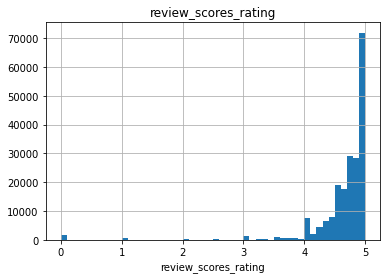



----REVIEW_SCORES_ACCURACY----
count   201629.000
mean         4.764
std          0.395
min          0.000
5%           4.070
10%          4.440
20%          4.650
30%          4.750
40%          4.820
50%          4.880
60%          4.920
70%          4.980
80%          5.000
90%          5.000
95%          5.000
99%          5.000
max          5.000
Name: review_scores_accuracy, dtype: float64




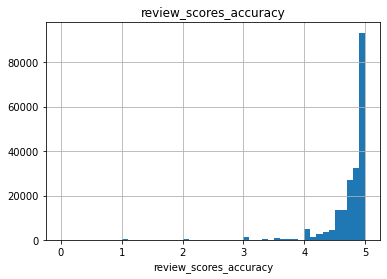



--REVIEW_SCORES_CLEANLINESS---
count   201644.000
mean         4.665
std          0.464
min          0.000
5%           3.960
10%          4.150
20%          4.480
30%          4.620
40%          4.720
50%          4.800
60%          4.880
70%          4.940
80%          5.000
90%          5.000
95%          5.000
99%          5.000
max          5.000
Name: review_scores_cleanliness, dtype: float64




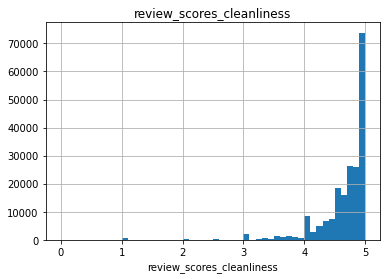



----REVIEW_SCORES_CHECKIN-----
count   201601.000
mean         4.809
std          0.369
min          0.000
5%           4.250
10%          4.500
20%          4.720
30%          4.810
40%          4.880
50%          4.920
60%          4.960
70%          5.000
80%          5.000
90%          5.000
95%          5.000
99%          5.000
max          5.000
Name: review_scores_checkin, dtype: float64




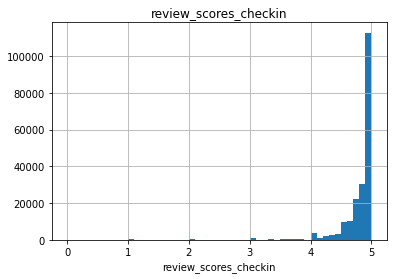



-REVIEW_SCORES_COMMUNICATION--
count   201636.000
mean         4.811
std          0.380
min          0.000
5%           4.230
10%          4.500
20%          4.720
30%          4.820
40%          4.890
50%          4.930
60%          4.980
70%          5.000
80%          5.000
90%          5.000
95%          5.000
99%          5.000
max          5.000
Name: review_scores_communication, dtype: float64




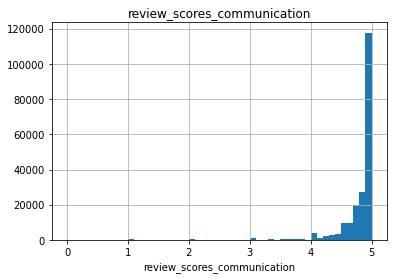



----REVIEW_SCORES_LOCATION----
count   201593.000
mean         4.770
std          0.347
min          0.000
5%           4.170
10%          4.440
20%          4.630
30%          4.740
40%          4.810
50%          4.880
60%          4.930
70%          4.990
80%          5.000
90%          5.000
95%          5.000
99%          5.000
max          5.000
Name: review_scores_location, dtype: float64




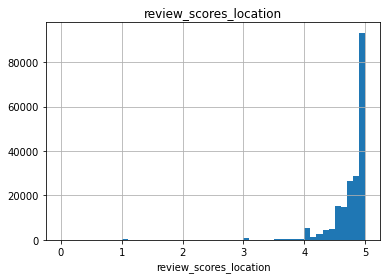



-----REVIEW_SCORES_VALUE------
count   201585.000
mean         4.635
std          0.431
min          0.000
5%           4.000
10%          4.200
20%          4.470
30%          4.570
40%          4.670
50%          4.730
60%          4.800
70%          4.860
80%          4.940
90%          5.000
95%          5.000
99%          5.000
max          5.000
Name: review_scores_value, dtype: float64




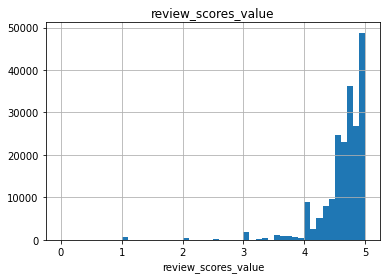



CALCULATED_HOST_LISTINGS_COUNT
count   245139.000
mean        10.423
std         29.193
min          1.000
5%           1.000
10%          1.000
20%          1.000
30%          1.000
40%          1.000
50%          1.000
60%          2.000
70%          3.000
80%          7.000
90%         23.000
95%         53.000
99%        179.000
max        269.000
Name: calculated_host_listings_count, dtype: float64




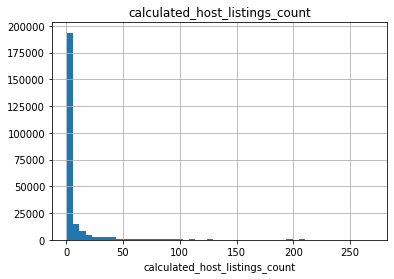



CALCULATED_HOST_LISTINGS_COUNT_ENTIRE_HOMES
count   245139.000
mean         9.099
std         28.622
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          1.000
40%          1.000
50%          1.000
60%          1.000
70%          2.000
80%          4.000
90%         19.000
95%         48.000
99%        179.000
max        269.000
Name: calculated_host_listings_count_entire_homes, dtype: float64




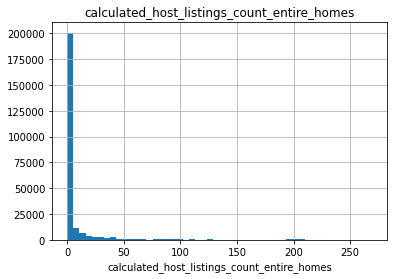



CALCULATED_HOST_LISTINGS_COUNT_PRIVATE_ROOMS
count   245139.000
mean         1.155
std          5.513
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          1.000
90%          2.000
95%          5.000
99%         19.000
max        132.000
Name: calculated_host_listings_count_private_rooms, dtype: float64




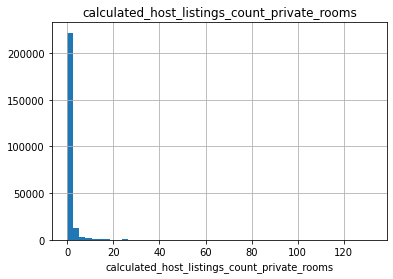



CALCULATED_HOST_LISTINGS_COUNT_SHARED_ROOMS
count   245139.000
mean         0.067
std          1.161
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.000
95%          0.000
99%          1.000
max         41.000
Name: calculated_host_listings_count_shared_rooms, dtype: float64




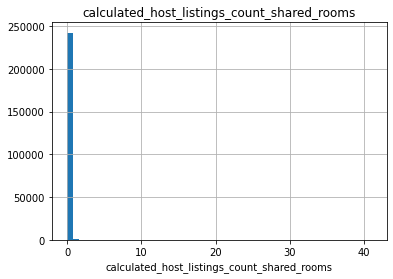



------REVIEWS_PER_MONTH-------
count   203314.000
mean         1.314
std          1.685
min          0.010
5%           0.030
10%          0.070
20%          0.160
30%          0.290
40%          0.480
50%          0.730
60%          1.030
70%          1.530
80%          2.200
90%          3.350
95%          4.470
99%          7.000
max        104.110
Name: reviews_per_month, dtype: float64




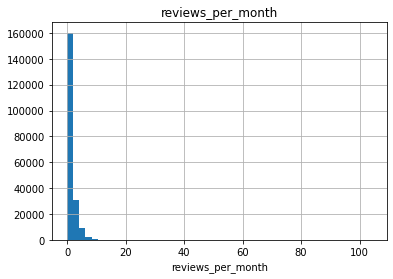

In [23]:
for col in num_cols:
    num_summary(df, col,plot=True)

In [24]:
def target_summary_with_cat(dataframe, target, categorical_col):
        print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [25]:
for col in cat_cols:
    target_summary_with_cat(df, "price", col)

              TARGET_MEAN
last_scraped             
2022-09-07        218.492
2022-09-09        152.827
2022-09-10        164.222
2022-09-11        172.269
2022-09-12        142.556
2022-09-13        102.436
2022-09-14        134.280
2022-09-15        166.379
2022-09-16        100.277
2022-09-17         89.764
2022-09-18        106.956
2022-09-19        117.714
2022-09-21        213.844
2022-09-22        172.207
2022-09-23        189.260
2022-09-24        151.214
2022-09-25        179.530
2022-09-26        147.431
2022-10-03         97.941


                 TARGET_MEAN
source                      
city scrape          165.448
previous scrape      114.155


                    TARGET_MEAN
host_response_time             
a few days or more      215.833
within a day            158.287
within a few hours      142.356
within an hour          159.833


                   TARGET_MEAN
host_is_superhost             
f                      149.839
t                      149.748


              

# Base Model

In [26]:
df_base = df.copy()

In [27]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_

In [28]:
df_base.head(1)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.000,1.000,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.364,4.944,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.000,2.000,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",49.000,3,28,3.000,3.000,1125.000,1125.000,3.000,1125.000,NaN,t,1,9,14,14,2022-09-07,305,25,1,2009-03-30,2022-08-30,4.890,4.940,5.000,4.970,4.980,4.690,4.820,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.860,Amsterdam


In [29]:
df_base.shape

(245139, 77)

In [30]:
drop_list = ['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview',
             'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url',
             'host_picture_url', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'calendar_updated',
             'calendar_last_scraped', 'first_review', 'last_review', 'license', 'bathrooms', 'amenities']
df_base.drop(drop_list,axis=1,inplace=True)

In [31]:
df_base.shape

(245139, 49)

In [32]:
df_base.dropna(inplace=True)

In [33]:
df_base.shape

(138465, 49)

In [35]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_base,car_th=1000)
print(f"\nNumerical Columns:{num_cols}\nCategorical Columns:{cat_cols}\nCardinal Columns:{cat_but_car}")

DF_BASE 

Observations: 138465
Variables: 49
cat_cols: 14
num_cols: 35
cat_but_car: 0
num_but_cat: 0

Numerical Columns:['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
Categorical Columns:['host_response

In [36]:
binary_cols = [col for col in df_base.columns if df_base[col].dtypes == "O" and len(df_base[col].unique()) == 2]

In [37]:
binary_cols

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

In [38]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
    
for col in binary_cols:
    label_encoder(df_base, col)

In [39]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_base = one_hot_encoder(df_base, cat_cols, drop_first=True)

In [40]:
y = df_base["price"]
X = df_base.drop(["price"], axis=1) 

In [41]:
lgbm = LGBMRegressor(random_state=42) 

In [42]:
scores = cross_validate(lgbm, X, y, cv=5,
                        scoring=('r2', 'neg_root_mean_squared_error'),
                        return_train_score=True,
                        n_jobs=-1,verbose=1)

NameError: ignored

In [ ]:
print("Train RMSE:", scores['train_neg_root_mean_squared_error'].mean())
print("Train R2:", scores['train_r2'].mean())
print("Test RMSE:", scores['test_neg_root_mean_squared_error'].mean())
print("Test R2:", scores['test_r2'].mean())

Train RMSE: -362.6451590800392
Train R2: 0.30086937180055545
Test RMSE: -413.71830673433186
Test R2: 0.022751019288465568


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [44]:
lgbm = LGBMRegressor(random_state=42).fit(X_train, y_train)

In [45]:
y_pred = lgbm.predict(X_test)

In [46]:
print("R2:",r2_score(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.38112057695803236
RMSE: 164.8493581949071


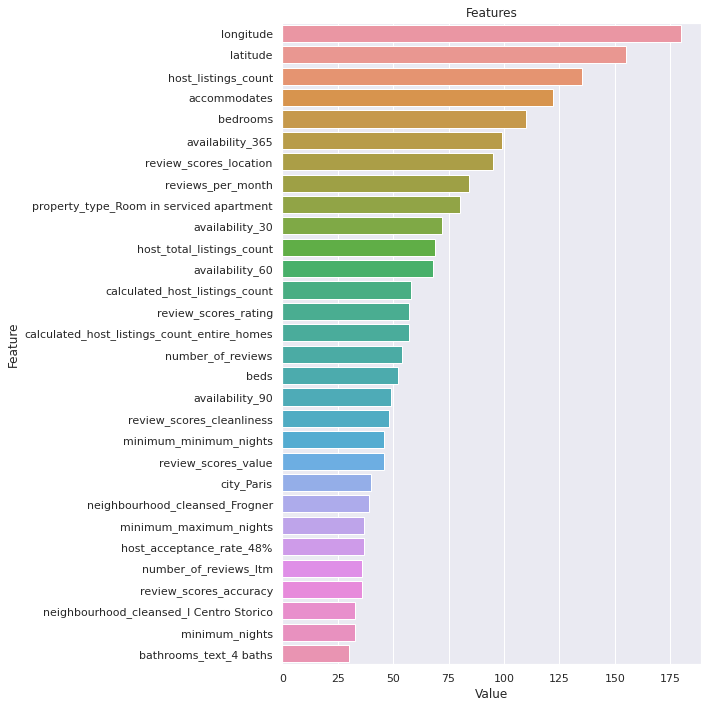

In [47]:
def plot_importance(model, features, num=30, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm, X)

# Exporting CSV with necessary columns


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_

In [ ]:
df.head(1)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.000,1.000,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.364,4.944,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.000,2.000,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",49.000,3,28,3.000,3.000,1125.000,1125.000,3.000,1125.000,NaN,t,1,9,14,14,2022-09-07,305,25,1,2009-03-30,2022-08-30,4.890,4.940,5.000,4.970,4.980,4.690,4.820,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.860,Amsterdam


In [ ]:
df_listings_stripped = df.copy()

In [ ]:
drop_list = ['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','neighbourhood', 'neighbourhood_group_cleansed',
 'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review', 'license']
 
df_listings_stripped.drop(drop_list,axis=1,inplace=True)

In [ ]:
df_listings_stripped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245139 entries, 0 to 245138
Data columns (total 51 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   host_response_time                            177111 non-null  object 
 1   host_response_rate                            177111 non-null  object 
 2   host_acceptance_rate                          189118 non-null  object 
 3   host_is_superhost                             245035 non-null  object 
 4   host_listings_count                           245099 non-null  float64
 5   host_total_listings_count                     245099 non-null  float64
 6   host_verifications                            245139 non-null  object 
 7   host_has_profile_pic                          245099 non-null  object 
 8   host_identity_verified                        245099 non-null  object 
 9   neighbourhood_cleansed                        24

In [ ]:
df_listings_stripped.to_csv('df_listings_stripped.csv', index=False)